In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()

In [147]:
def gen_error(w1, w2):
    return 0.5 * (1 - norm.cdf(w1/np.sqrt(w1**2 + w2**2)) +  norm.cdf(-w1/np.sqrt(w1**2 + w2**2)))

In [148]:
reps = 5000
n = 4
m_list = np.arange(0, 20, 0.1)
theta_list = [0, 5, 30, 45, 60, 90]
df = pd.DataFrame()

for theta in theta_list:
    theta_rad = theta/180*np.pi
    k = 0
    for m in m_list.tolist():
        L = 0
        for i in range(reps):
            mu1 = (n + m*np.cos(theta_rad))/(n+m)
            mu2 = (-m*np.sin(theta_rad))/(n+m)
            sigma = 1/np.sqrt(n+m)
            w1 = np.random.normal(mu1, sigma)
            w2 = np.random.normal(mu2, sigma)
            L += gen_error(w1, w2)
        df.at[k, "m"] = m
        df.at[k, theta] = L/reps
        k += 1

In [155]:
dfm = df.melt(['m'], var_name='Theta', value_name='Risk')

(0.0, 20.0)

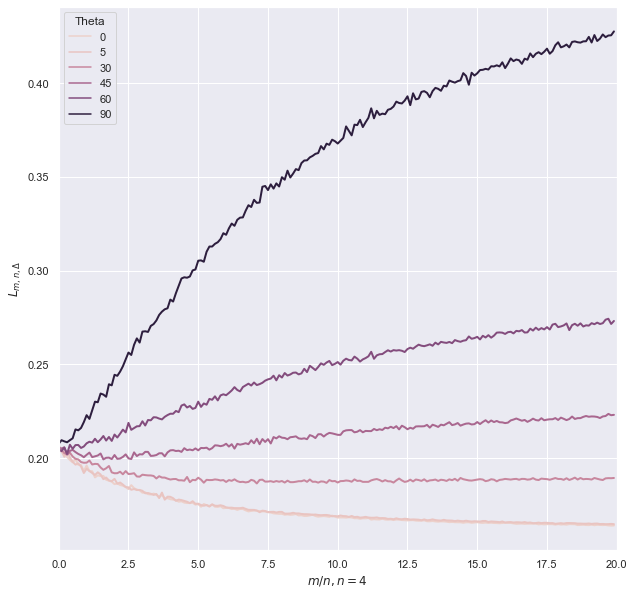

In [156]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax = sns.lineplot(data=dfm, x="m", y="Risk",hue="Theta", ax=ax, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n=4$")
ax.set_xlim([0, 20])

In [157]:
filename = "2d_fld"
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/{}.svg".format(filename), bbox_inches="tight")

(0.0, 20.0)

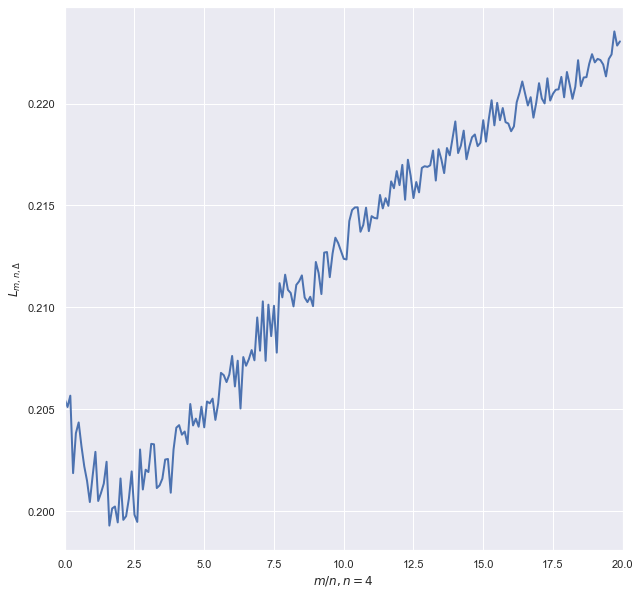

In [159]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax = sns.lineplot(data=df, x="m", y=45, ax=ax, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n=4$")
ax.set_xlim([0, 20])

In [160]:
filename = "2d_fld_45"
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/{}.svg".format(filename), bbox_inches="tight")

---

In [142]:
def gen_error(h, g, A):
    return 0.5 * (1 - norm.cdf(h + A/g + 1) +  norm.cdf(h + A/g - 1))

In [143]:
reps = 100
n = 4
m_list = np.arange(0, 20, 0.1)
phi_in = 0.4
phi_out = 0.5
delta_list = [0.1, 0.5, 1, 2, 5]
df = pd.DataFrame()

for delta in delta_list:
    k = 0
    for m in m_list.tolist():
        L = 0
        for i in range(reps):
            # mu1 = 2 + delta * ( (m*phi_out)/(n*phi_in + m*phi_out) - (m*(1-phi_out))/(n*(1-phi_in) + m*(1-phi_out)) )
            # mu2 = 0
            # sigma1 = np.sqrt(( 1/(n*phi_in + m*phi_out) + 1/(n*(1-phi_in) + m*(1-phi_out)) ))
            # sigma2 = np.sqrt((1/4*n)* ( 1/phi_in + 1/phi_out))
            mu1 = 0
            sigma1 = 1/np.sqrt(n)
            mu2 = 2
            sigma2 = 2/np.sqrt(n+m)
            g = np.random.normal(mu2, sigma2)
            h = np.random.normal(mu1, sigma1)
            A = (1 + m*n*delta**2/(m+n)**2)*np.log((1-phi_in)/phi_in)
            L += gen_error(h, g, A)
            # L += gen_error(h, g, np.log((1-phi_in)/(phi_in)))
            # L += gen_error(mu2, mu1, np.log((1-phi_in)/(phi_in)))
        df.at[k, "m"] = m
        df.at[k, delta] = L/reps
        k += 1

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax = sns.lineplot(data=df, x="m", y=1, ax=ax, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n=5$")
ax.set_xlim([0, 20])

In [144]:
dfm = df.melt(['m'], var_name='Delta', value_name='Risk')

(0.0, 20.0)

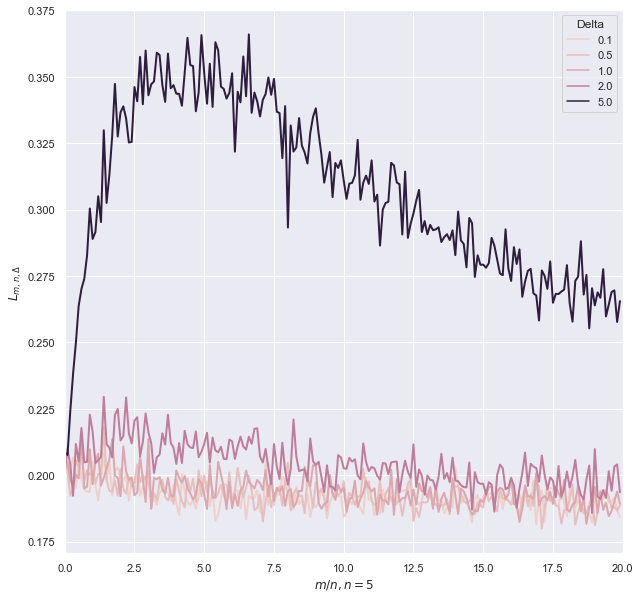

In [145]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax = sns.lineplot(data=dfm, x="m", y="Risk",hue="Delta", ax=ax, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n=5$")
ax.set_xlim([0, 20])